## RNNs Basics (SimpleRNN & LSTM)

#### Introduction

In [9]:
# Numpy implementation of a simple RNN
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

# Generate random noise as input
inputs = np.random.random((timesteps, input_features))
# Initialise an all-zero output vector
state_t = np.zeros((output_features,))

# Now we create random weight matrices
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
    
# The final output is a 2D tensor of shape (timesteps, output_features)
final_output_sequence = np.concatenate(successive_outputs, axis=0)

# Basically the RNN is a for loop that re-uses quantities computed during the previous iteration
# of the loop

#### RNN in Keras

This is implemented in Keras with the `SimpleRNN` layer. The only difference with the example above is that `SimpleRNN` takes batches of sequences at a time rather than just a single sequence. So the input shape will be `(batch_size, timesteps, input_features)` instead of `(timesteps, input_features)`. All recurrent layers in Keras can return either the full sequence (a 3D tensor of shape `(batch_size, timesteps, output_features)`) or only the last output (a 2D tensor of shape `(batch_size, output_features)`)

In [16]:
# Returning only final output
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Returning the full sequence
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Returning the full sequence is needed when we want to stack a few RNN layers on top of each other
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


#### IMDB classification using SimpleRNN

In [21]:
# Preparing the data
from keras.datasets import imdb
from keras.preprocessing import sequence

# Number of words to consider as features
max_features = 10000
# Maximum length of sequences
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [26]:
# We now train a simple network with an embedding layer and a simpleRNN layer
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.6471 - acc: 0.6093 - val_loss: 0.5455 - val_acc: 0.7372
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.4137 - acc: 0.8245 - val_loss: 0.3923 - val_acc: 0.8338
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3034 - acc: 0.8778 - val_loss: 0.4039 - val_acc: 0.8474
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2356 - acc: 0.9085 - val_loss: 0.3965 - val_acc: 0.8372
Epoch 5/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1691 - acc: 0.9371 - val_loss: 0.3861 - val_acc: 0.8540
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1146 - acc: 0.9613 - val_loss: 0.5311 - val_acc: 0.8120
Epoch 7/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.0708 - acc: 0.9775 - val_loss: 0.4682 - val_acc:

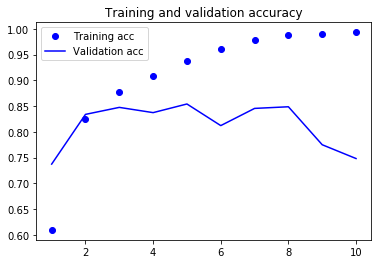

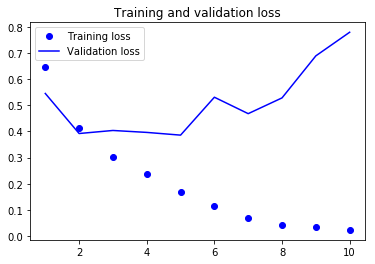

In [27]:
# And then we visualise loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

We're reaching a maximum validation accuracy of ~85%. This is actually lower than the baseline we obtained in Chapter 3 with the naive approach. This is probably because we're only using the first 500 words of each sequence, while in the baseline we were using the full sequence. **SimpleRNN** isn’t good at processing long sequences, such as text. Other types of recurrent layers perform much better.

#### IMDB classification using LSTM

**SimpleRNN** is never really used because it's unable to handle long sequences. It suffers from the *vanishing gradient problem*. **LSTM** and **GRU** layers are designed to address this problem.
The **LSTM (Long short-term memory)** is a variant of the SimpleRNN: it adds a way to carry information across many timesteps. In other words, it saves information for later, thus preventing older signals from gradually vanishing during processing.

In [28]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
# Just keeping Keras defaults...
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.5540 - acc: 0.7443 - val_loss: 0.4259 - val_acc: 0.8350
Epoch 2/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.3025 - acc: 0.8813 - val_loss: 0.3050 - val_acc: 0.8768
Epoch 3/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.2358 - acc: 0.9097 - val_loss: 0.2902 - val_acc: 0.8896
Epoch 4/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.2029 - acc: 0.9259 - val_loss: 0.2912 - val_acc: 0.8806
Epoch 5/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1736 - acc: 0.9375 - val_loss: 0.3473 - val_acc: 0.8544
Epoch 6/10
20000/20000 [==============================] - 119s 6ms/step - loss: 0.1578 - acc: 0.9422 - val_loss: 0.4031 - val_acc: 0.8772
Epoch 7/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1429 - acc: 0.9496 - val_loss: 0.3151 - v

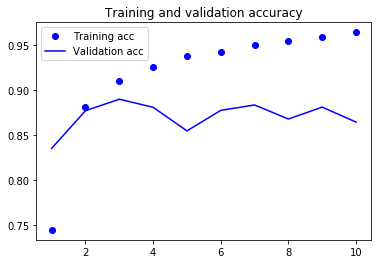

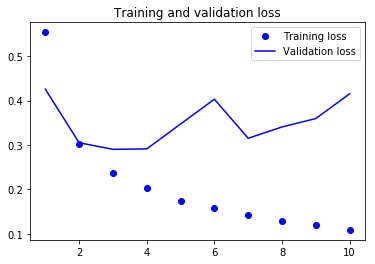

In [29]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

We can see that we reach a validation accuracy of ~89%. A bit better than the baseline. But this is mainly because LSTMs is not the right tool for sentiment analysis. A fully connected approach in that case is more approapriate. We will now explore a more advanced use of recurrent neural network.